# Parte práctica del segundo parcial de Estadística I.
## Integrantes
* Brayan Isaac Vásquez Portocarrero
* Daniel Eduardo Naranjo Garzón

## Objetivos
* Gráficos para datos unviariados cuantitativos
* Determinar las medidas descriptivas para datos datos univariados cuantitativos

In [1]:
#Importación de paquetes usados
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.linear_model import *
from scipy.stats import *
from sympy import *
from IPython.display import Markdown as md

In [2]:
ruta_archivo = 'nac2020.csv'
tabla = pd.read_csv(ruta_archivo, sep=',', index_col=0, encoding='latin-1')
print(tabla.head(4))

          COD_MUNIC  AREANAC  SIT_PARTO OTRO_SIT  SEXO  PESO_NAC  TALLA_NAC  \
COD_DPTO                                                                      
44              560        3          2      NaN     2         9          9   
44              560        3          2      NaN     1         9          9   
44              560        3          2      NaN     1         9          9   
44              560        3          2      NaN     2         9          9   

           ANO  MES  ATEN_PAR  ...  AREA_RES  N_HIJOSV  FECHA_NACM  N_EMB  \
COD_DPTO                       ...                                          
44        2020   11         5  ...       3.0         1         NaN      1   
44        2020   10         5  ...       3.0         1         NaN      1   
44        2020   10         5  ...       3.0         1         NaN      1   
44        2020    4         5  ...       3.0         1         NaN      1   

          SEG_SOCIAL  IDCLASADMI  EDAD_PADRE  NIV_EDUP  ULTCUR

In [3]:
edpadre= f'edad de un padre de un recién nacido en Colombia'
nemb= f'número de embarazos incluido el presente en Colombia'

df = tabla[["EDAD_PADRE", "N_EMB"]]
df1 = df[(df.EDAD_PADRE != 999) & (df.N_EMB != 99)]
df1.head(4)

,EDAD_PADRE,N_EMB
COD_DPTO,,
44,20,1
44,20,1
44,20,1
44,20,1


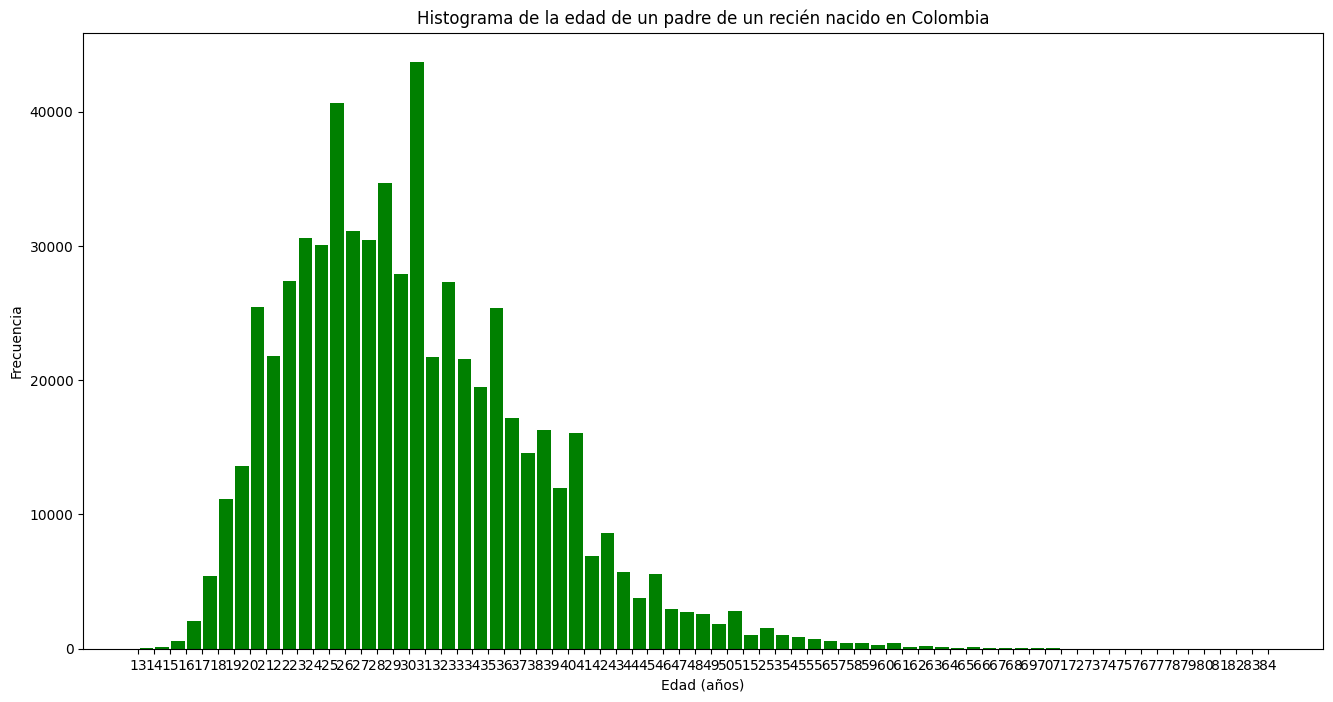

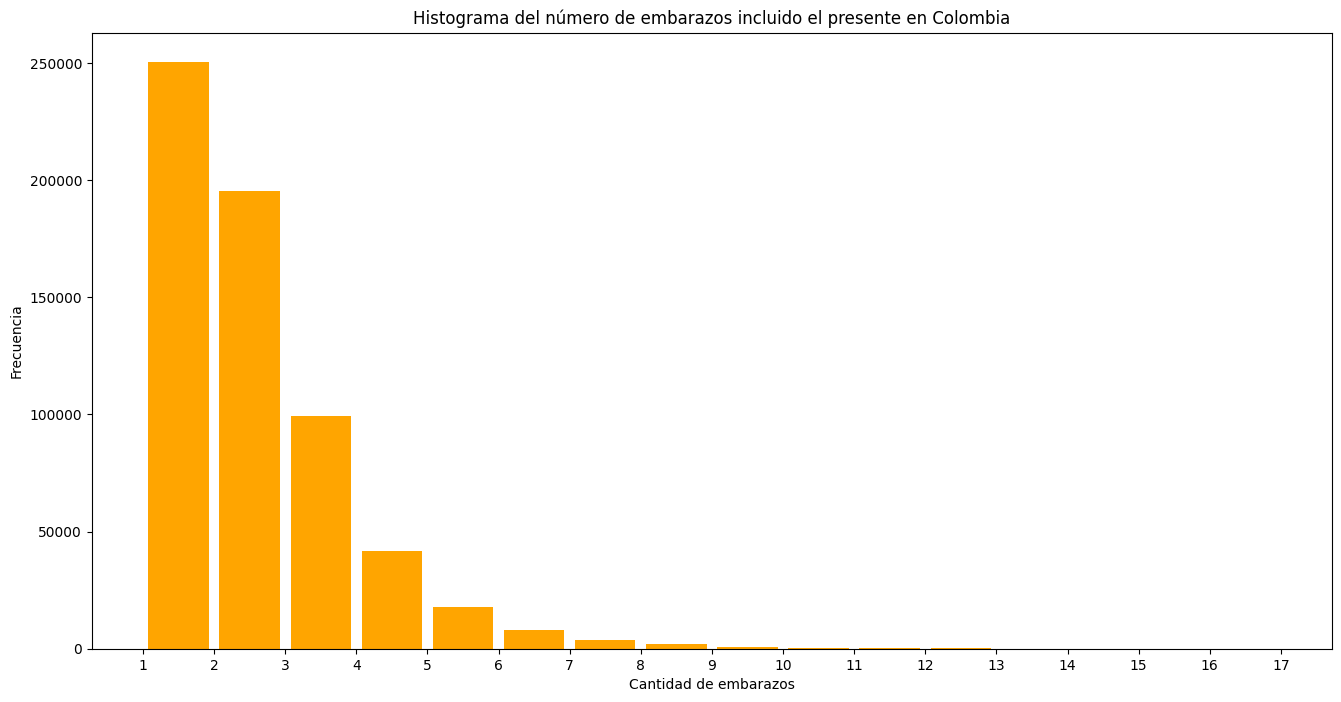

In [4]:
plt.figure(figsize=(16, 8))
intervalos = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE)+1, 1)
plt.hist(df1.EDAD_PADRE, bins=intervalos, color='green', rwidth=0.85)
plt.title(f'Histograma de la {edpadre}')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

plt.figure(figsize=(16, 8))
intervalos_nemb = range(min(df1.N_EMB), max(df1.N_EMB)+1, 1)
plt.hist(df1.N_EMB, bins=intervalos_nemb, color='orange', rwidth=0.85)
plt.title(f'Histograma del {nemb}')
plt.xlabel('Cantidad de embarazos')
plt.ylabel('Frecuencia')
plt.xticks(intervalos_nemb)
plt.show()

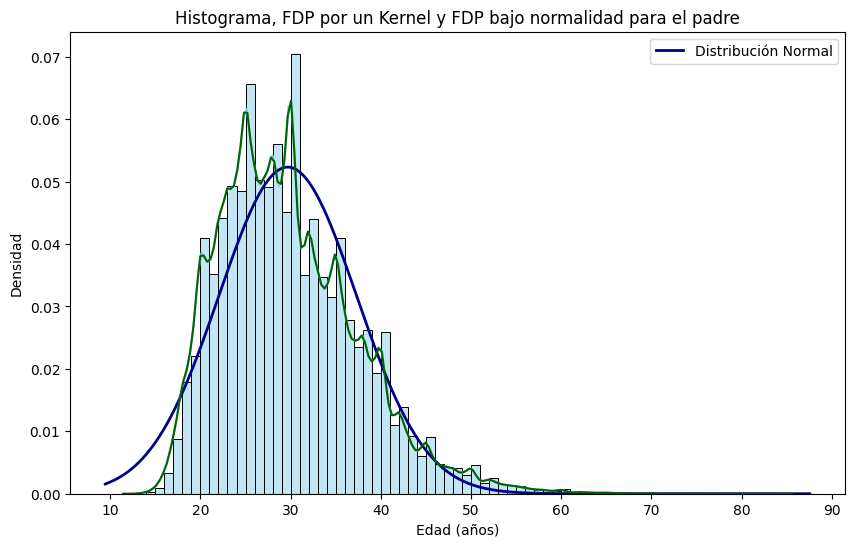

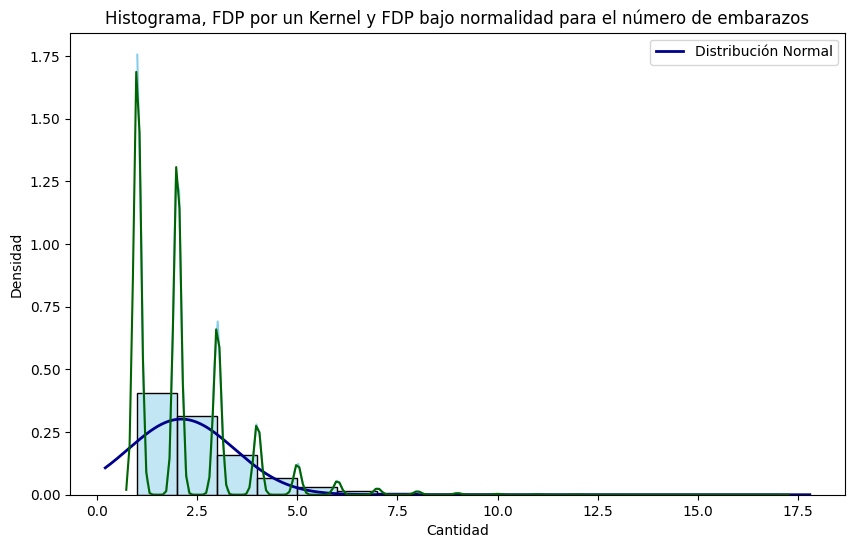

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(x = df1.EDAD_PADRE, bins = intervalos, kde = True, stat = "density", color = "skyblue", edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE))
plt.plot(x, p, color="darkblue", linewidth=2, label='Distribución Normal')
sns.kdeplot(x=df1.EDAD_PADRE, color = "darkgreen")
plt.title('Histograma, FDP por un Kernel y FDP bajo normalidad para el padre')
plt.xlabel('Edad (años)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(x = df1.N_EMB, bins = intervalos_nemb, kde = True, stat = "density", color = "skyblue", edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.N_EMB), np.std(df1.N_EMB))
plt.plot(x, p, color="darkblue", linewidth=2, label='Distribución Normal')
sns.kdeplot(x=df1.N_EMB, color = "darkgreen")
plt.title('Histograma, FDP por un Kernel y FDP bajo normalidad para el número de embarazos')
plt.xlabel('Cantidad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Sea $X:=$ "Edad del padre de un recién nacido en Colombia" y $Y:=$ "Número de embarazos incluido el presente de una madre en Colombia"

Descriptivamente como la función de densidad de probabilidad de los datos estimada por un método Kernel (línea cyan) no coincide con la función de densidad de probabilidad asumiendo el supuesto de normalidad (línea azul), $X\sim \text{Normal} (\text{Media} = \bar{x}, \text{Varianza} = S^2_x)$, entonces no se asume normalidad para la variable aleatoria X.

De forma análoga, no asumimos normalidad para la variable aleatoria Y.

In [6]:
print(f'Shapiro para la variable EDAD_PADRE: {shapiro(df1.EDAD_PADRE)}\nShapiro para la variable N_EMB: {shapiro(df1.N_EMB)}\n')
df1.EDAD_PADRE.count()
df1.N_EMB.count()
print(f'Note que la variable EDAD_PADRE trabaja con {len(df1.EDAD_PADRE)} datos,\n mientras que para la variable N_EMB se trabajan con {len(df1.N_EMB)} datos.\n')


Shapiro para la variable EDAD_PADRE: ShapiroResult(statistic=np.float64(0.9585366961101476), pvalue=np.float64(1.055054862132998e-120))
Shapiro para la variable N_EMB: ShapiroResult(statistic=np.float64(0.7727150151798861), pvalue=np.float64(7.969573267820397e-175))

Note que la variable EDAD_PADRE trabaja con 620089 datos,
 mientras que para la variable N_EMB se trabajan con 620089 datos.



c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 620089.
  res = hypotest_fun_out(*samples, **kwds)


In [7]:
md(f''' *   Si el **valor p** en una prueba de hipótesis es menor que 0.05 se rechaza la hipótesis nula con una confianza del 95%
*   Si el **valor p** en una prueba de hipótesis es mayor que 0.05 no se rechaza la hipótesis nula con una confianza del 95%

En nuestro caso particular, tenemos que para la variable `EDAD_PADRE`, $pvalue= {latex(shapiro(df1.EDAD_PADRE)[1])} < 0.05 $ ({shapiro(df1.EDAD_PADRE)[1] < 0.05}), es decir, se rechaza que la variable aleatoria de la edad de un padre de un recién nacido en Colombia presenta distribución normal. 

De igual forma, se tiene que para la variable `N_EMB`, $pvalue={latex(shapiro(df1.N_EMB)[1])} < 0.05$ ({shapiro(df1.N_EMB)[1]<0.05}), por tanto se presenta la misma conclusión.
''')

 *   Si el **valor p** en una prueba de hipótesis es menor que 0.05 se rechaza la hipótesis nula con una confianza del 95%
*   Si el **valor p** en una prueba de hipótesis es mayor que 0.05 no se rechaza la hipótesis nula con una confianza del 95%

En nuestro caso particular, tenemos que para la variable `EDAD_PADRE`, $pvalue= 1.055054862133 \cdot 10^{-120} < 0.05 $ (True), es decir, se rechaza que la variable aleatoria de la edad de un padre de un recién nacido en Colombia presenta distribución normal. 

De igual forma, se tiene que para la variable `N_EMB`, $pvalue=7.9695732678204 \cdot 10^{-175} < 0.05$ (True), por tanto se presenta la misma conclusión.


In [8]:
idx = np.random.randint(len(df1.EDAD_PADRE), size = 100)
idx1 = np.random.randint(len(df1.N_EMB), size = 100)
print(f'Shapiro para una muestra de la variable EDAD_PADRE: {shapiro(df1.EDAD_PADRE.index[idx])}\nShapiro para una muestra de la variable N_EMB: {shapiro(df1.N_EMB.index[idx1])}\n')

Shapiro para una muestra de la variable EDAD_PADRE: ShapiroResult(statistic=np.float64(0.8697102674319074), pvalue=np.float64(6.824131747743442e-08))
Shapiro para una muestra de la variable N_EMB: ShapiroResult(statistic=np.float64(0.8875386349348456), pvalue=np.float64(3.8369088334969654e-07))



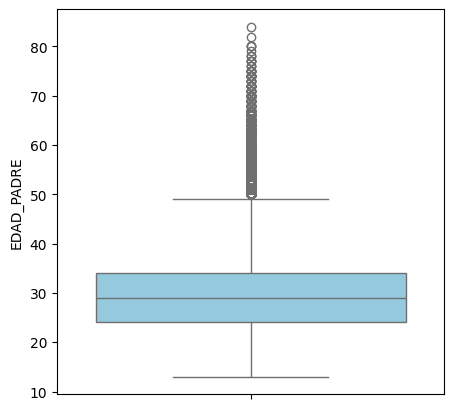

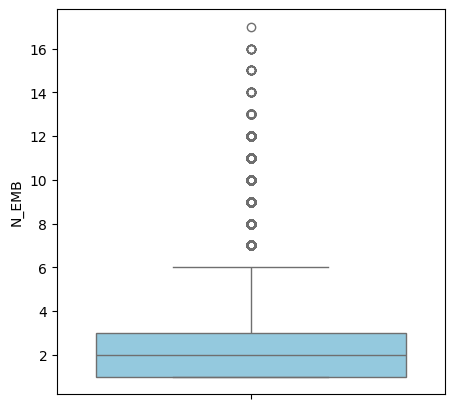

In [9]:
plt.figure(figsize=(5, 5))
sns.boxplot(df1.EDAD_PADRE, color='skyblue', saturation=0.75)
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(df1.N_EMB, color='skyblue', saturation=0.75)
plt.show()

### Análisis de cuartiles

In [10]:
# Un código adicional
q11, q12, q13, q14 = np.percentile(df1.EDAD_PADRE, [25, 50, 75,95])
q21, q22, q23, q24 = np.percentile(df1.N_EMB, [25, 50, 75, 95])
print(q11, q12, q13, q14, q21, q22, q23, q24)

24.0 29.0 34.0 43.0 1.0 2.0 3.0 5.0


In [11]:
md(f'''Para la variable aleatoria X, se considera que la {edpadre} es atípica si es mayor que 50 años. Ahora, 
    $$\\text{{Rango intercuantílico: Tercer cuartil - Primer cuartil}}= {q13}- {q11}= {q13-q11}$$
    Para la variable Y, se considera que el {nemb} es atípico si es mayor a 6. Ahora, 
    $$\\text{{Rango intercuantílico: Tercer cuartil - Primer cuartil}}= {q23}- {q21}= {q23-q21}$$
''')

Para la variable aleatoria X, se considera que la edad de un padre de un recién nacido en Colombia es atípica si es mayor que 50 años. Ahora, 
    $$\text{Rango intercuantílico: Tercer cuartil - Primer cuartil}= 34.0- 24.0= 10.0$$
    Para la variable Y, se considera que el número de embarazos incluido el presente en Colombia es atípico si es mayor a 6. Ahora, 
    $$\text{Rango intercuantílico: Tercer cuartil - Primer cuartil}= 3.0- 1.0= 2.0$$


### Diagrama de puntos

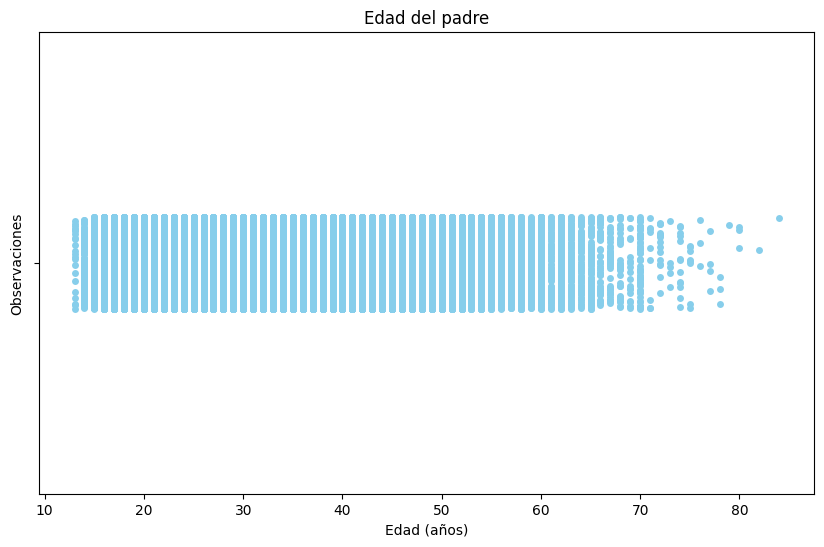

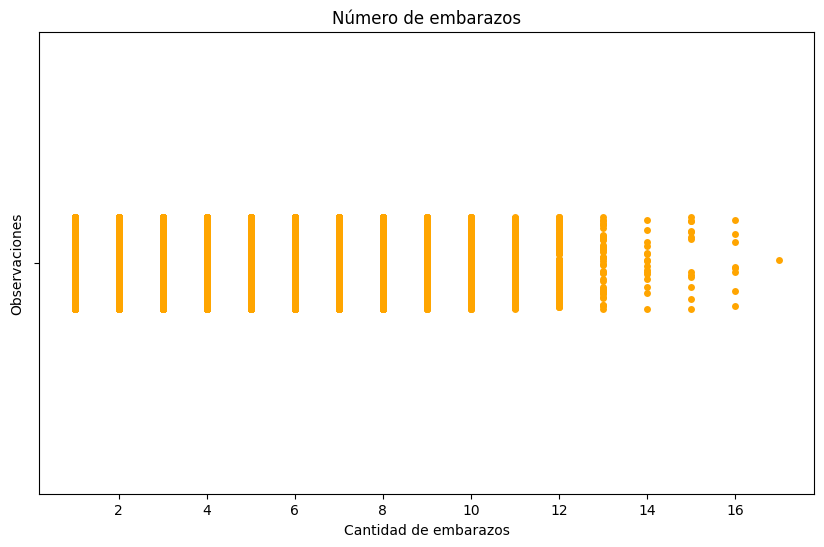

In [12]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='EDAD_PADRE', data=df1, orient='h', color='skyblue')
plt.title('Edad del padre')
plt.xlabel('Edad (años)')
plt.ylabel('Observaciones')
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(x='N_EMB', data=df1, orient='h', color='orange')
plt.title('Número de embarazos')
plt.xlabel('Cantidad de embarazos')
plt.ylabel('Observaciones')
plt.show()

De acuerdo con el diagrama de puntos, se aprecia que la mayoría de los puntos se concentran entre los 20 y 40 años, lo que indica que esta es la franja de edad más común para la paternidad en Colombia. Note que hay observaciones que están entre los 10 a 80 años, demostrando que la paternidad puede ocurrir en diversas etapas de la vida. Podemos sugerir que hay menos casos de paternidad en edades avanzadas y se concluye que la alta variabilidad de los datos refleja que, aunque hay una tendencia hacia ciertas edades, la paternidad en Colombia no se limita a un rango de edad específico.

Respecto al número de embarazos, se observa una distribución amplia en el número de embarazos de las madres. La concentración más alta de datos se da en conteos bajos de embarazos, reduciendo la frecuencia a medida que aumenta el número. Esto indica que la mayoría de las madres tienen un menor número de embarazos, mientras que un grupo más pequeño ha experimentado una mayor cantidad de embarazos. Como punto de vista, esta variabilidad refleja las diferentes experiencias y decisiones de planificación familiar en la población estudiada.

Como análisis adicional, al examinar la [preocupante encuesta](https://www.dane.gov.co/index.php/estadisticas-por-tema/salud/nacimientos-y-defunciones/nacimientos/nacimientos-2024) realizada en el primer cuatrimestre del presente año, concluimos que el número de nacimientos está disminuyendo en el país. Para llegar a esta conclusión, revisamos [este enlace](https://www.dane.gov.co/files/operaciones/EEVV/2024/21-junio-2024/anex-EEVV-Nacimientos2024pCuadroUnificado-Itrim2024.xls), donde se encuentran los registros de nacimientos hasta la fecha indicada.

- La disminución de los nacimientos podría tener varias causas:
    - **Tendencias familiares:** Las familias millennials pueden estar optando por tener menos hijos o retrasar la formación de un hogar.
    - **Cambios en la mentalidad:** Existe una alta opinión sobre no desear formar un hogar o tener hijos.
    - **Impacto de la tecnología:** El uso generalizado de dispositivos de entretenimiento podría influir en las decisiones de planificación familiar.

**Conclusiones:**
- Es importante seguir monitoreando esta tendencia y comprender sus implicaciones para la sociedad y la economía.
- Las políticas públicas y programas de salud reproductiva deben adaptarse a estos cambios demográficos.

## Medidas descriptivas

In [13]:
med_des_pa = [np.mean(df1.EDAD_PADRE), np.var(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE), skew(df1.EDAD_PADRE), kurtosis(df1.EDAD_PADRE)]
print(f'Respecto a la variable aleatoria X, se tiene que \nMedia: {med_des_pa[0]}\nVarianza: {med_des_pa[1]}\nAsimetría: {med_des_pa[3]}\nCurtosis: {med_des_pa[4]}\n')

med_des_ne = [np.mean(df1.N_EMB), np.var(df1.N_EMB), np.std(df1.N_EMB), skew(df1.N_EMB), kurtosis(df1.N_EMB)]
print(f'Respecto a la variable aleatoria Y, se tiene que \nMedia: {med_des_ne[0]}\nVarianza: {med_des_ne[1]}\nAsimetría: {med_des_ne[3]}\nCurtosis: {med_des_ne[4]}\n')

def distribucion(variable):
    if variable[3]>0:
        return f'asimétrica positiva, es decir, la media es mayor a la moda de la variable aleatoria.'
    elif variable[3]<0:
        return f'asimétrica negativa, es decir, la media es menor a la moda de la variable aleatoria.'
    else:
        return f'simétrica, es decir, la media es igual a la moda de la variable aleatoria.'
    
def curtosis(variable):
    if variable[4]>3:
        return f'leptocúrtica, es decir, hay una alta concentración de los datos con respecto a la media aritmética.'
    if variable[4]<3:
        return f'platicúrtica, es decir, hay una baja concentración de los datos con respecto a la media aritmética.'
    else:
        return f'mesocúrtica, es decir, están igual de apuntados que la media aritmética.'

Respecto a la variable aleatoria X, se tiene que 
Media: 29.677776899767615
Varianza: 58.1447930361801
Asimetría: 0.8354644123854555
Curtosis: 0.9742935943340898

Respecto a la variable aleatoria Y, se tiene que 
Media: 2.1018111916192677
Varianza: 1.7487690571042107
Asimetría: 1.9224080210250476
Curtosis: 6.016780393777454



In [14]:
md(f'''Respecto a la variable aleatoria X se tiene que
   * Aproximadamente la {edpadre} es de {med_des_pa[0]:.1f} 
   * Aproximadamente la distancia entre los valores de la {edpadre} y la media es de {med_des_pa[2]:.5f}
   * La distribución de la {edpadre} es {distribucion(med_des_pa)}
   * La distribución de la {edpadre} es {curtosis(med_des_pa)}
   
Respecto a la variable aleatoria Y se tiene que
   * Aproximadamente el {nemb} es de {med_des_ne[0]:.0f} 
   * Aproximadamente la distancia entre los valores del {nemb} y la media es de {med_des_ne[2]:.5f}
   * La distribución del {nemb} es {distribucion(med_des_pa)}
   * La distribución del {nemb} es {curtosis(med_des_pa)}
   ''')

Respecto a la variable aleatoria X se tiene que
   * Aproximadamente la edad de un padre de un recién nacido en Colombia es de 29.7 
   * Aproximadamente la distancia entre los valores de la edad de un padre de un recién nacido en Colombia y la media es de 7.62527
   * La distribución de la edad de un padre de un recién nacido en Colombia es asimétrica positiva, es decir, la media es mayor a la moda de la variable aleatoria.
   * La distribución de la edad de un padre de un recién nacido en Colombia es platicúrtica, es decir, hay una baja concentración de los datos con respecto a la media aritmética.
   
Respecto a la variable aleatoria Y se tiene que
   * Aproximadamente el número de embarazos incluido el presente en Colombia es de 2 
   * Aproximadamente la distancia entre los valores del número de embarazos incluido el presente en Colombia y la media es de 1.32241
   * La distribución del número de embarazos incluido el presente en Colombia es asimétrica positiva, es decir, la media es mayor a la moda de la variable aleatoria.
   * La distribución del número de embarazos incluido el presente en Colombia es platicúrtica, es decir, hay una baja concentración de los datos con respecto a la media aritmética.
   

## Estadística descriptiva para datos bivariados

### Existencia o correlación entre dos variables

A continuación veremos si una variable se correlaciona o depende de otra. 

* Una variable depende de la otra cuando la ejecución de ésta se ve afectada por la variable independiente. *Por ejemplo*, el precio de una casa depende del número de habitaciones. La velocidad depende del tiempo. 
* Una variable está correlacionada con otra cuando guardan cierta relación, pero no es posible hablar de una dependencia. *Por ejemplo*, el consumo de arroz y de carne.

### Diagrama de dispersión

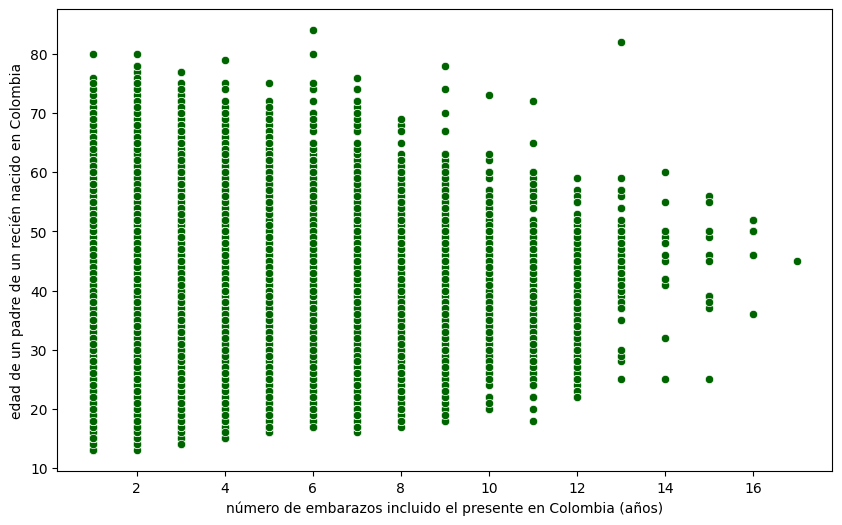

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='N_EMB', y='EDAD_PADRE', data=df1, color='darkgreen', marker='o')
plt.xlabel(f'{nemb} (años)')
plt.ylabel(edpadre)
plt.show()

In [16]:
md(f''' #### Se observa en el anterior diagrama una nube de puntos sin un patrón particular, indicando que las variables no se correlacionan entre sí. Para el caso, entonces el {nemb} y la {edpadre} en Colombia no están correlacionadas.
''')

 #### Se observa en el anterior diagrama una nube de puntos sin un patrón particular, indicando que las variables no se correlacionan entre sí. Para el caso, entonces el número de embarazos incluido el presente en Colombia y la edad de un padre de un recién nacido en Colombia en Colombia no están correlacionadas.


### Recta de regresión para datos bivariados

In [17]:
modelo = LinearRegression()
modelo.fit(df1[['N_EMB']], df1['EDAD_PADRE'])
predi_lineal = modelo.predict(df1[['N_EMB']])
predi_lineal

array([27.43534225, 27.43534225, 27.43534225, ..., 29.47056813,
       27.43534225, 27.43534225])

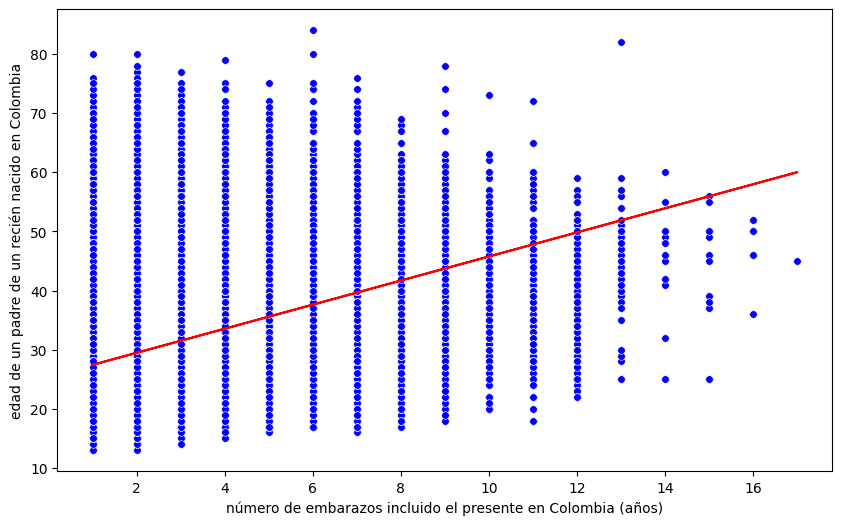

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='N_EMB', y='EDAD_PADRE', data=df1, color='blue', marker='o', s=30)
plt.plot(df1['N_EMB'], predi_lineal, linestyle='-', color='red')
plt.xlabel(f'{nemb} (años)')
plt.ylabel(edpadre)
plt.show()

De acuerdo con lo obtenido en la recta de regresión se determina una correlación positiva, pues a medida que aumenta el número de embarazos, también lo hace la edad de los padres. Esto podría indicar que los padres más mayores tienden a tener más hijos o que aquellos con más hijos son, en promedio, más mayores.

La variable Y depende positivamente de la variable X, pues entre mayor valor de X se tenga, mayor será el valor de Y

Para la interpretación de los coeficientes de correlación nos ayudaremos de la referencia:

Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [Enlace de acceso](https://www.jstor.org/stable/pdf/2529310.pdf)

In [19]:
def correlacion(var1, var2):
   coef_pearson = np.corrcoef(df1[var1], df1[var2])[0, 1]
   coef_spearman = df1[var1].corr(df1[var2], method='spearman')
   coef_kendall = df1[var1].corr(df1[var2], method='kendall')

   def tipo(a,b,c):
      ck, cp, cs = abs(a), abs(b), abs(c)
      if cp==0 and ck==0 and cs==0:
         return f'no están correlacionadas.'
      elif 0<ck<0.2 and 0<cp<0.2 and 0<cs<0.2:
         return f'están insignificantmente correlacionadas'
      elif 0.2<ck<0.4 and 0.2<cp<0.4 and 0.2<cs<0.4:
         return f'están discretamente correlacionadas'
      elif 0.4<ck<0.6 and 0.4<cp<0.6 and 0.4<cs<0.6:
         return f'están moderadamente correlacionadas'
      elif 0.6<ck<0.8 and 0.6<cp<0.8 and 0.6<cs<0.8:
         return f'están sustancialmente correlacionadas'
      elif 0.8<ck<1 and 0.8<cp<1 and 0.8<cs<1:
         return f'están fuertmente correlacionadas'

   return md(f'''## Coeficientes de correlación: 
   * Pearson: {coef_pearson}
   * Spearman: {coef_spearman}
   * Kendall: {coef_kendall}

   De acuerdo con los coeficientes de correlación de Pearson, de Kendall y de Spearman se determina que 
   el {nemb} y la {edpadre} {tipo(coef_kendall, coef_pearson, coef_spearman)}.
   ''')
   
correlacion('N_EMB', 'EDAD_PADRE')

## Coeficientes de correlación: 
   * Pearson: 0.35295832666767935
   * Spearman: 0.3798591704704968
   * Kendall: 0.29686774207661487

   De acuerdo con los coeficientes de correlación de Pearson, de Kendall y de Spearman se determina que 
   el número de embarazos incluido el presente en Colombia y la edad de un padre de un recién nacido en Colombia están discretamente correlacionadas.
   